# GenAI Career Assistant Agent – Your Ultimate Guide to a Career in Generative AI!🚀
<a href="https://colab.research.google.com/drive/19lYWHVgRSSyY84HW3WkwJ9OFAA25T8KW?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
## Overview
Meet the GenAI Career Assistant—an AI-powered mentor designed to simplify and support your journey in Generative AI learning, Resume preparation, Interview assistant and job hunting.
#### Tech Stack
I have used all free Open source.<br>
Langchain,Langgraph, Gemini LLM, DuckDuckGoSearchResult

## Motivation
As GenAI rapidly evolves, more people are eager to learn it for career advancement or transition. However, navigating the vast resources on the internet and platforms like YouTube can be overwhelming, with long videos and scattered, outdated materials making it hard to know where to begin in this busy life. Even using ChatGPT for coding help often yields deprecated code, as GenAI packages and methods—such as LangChain, LlamaIndex, and Hugging Face—are updated frequently.

### Key Features

1. **Learning & Content Creation:**
   - Offers tailored learning pathways in GenAI, covering key topics and skills.
   - Assists users in creating tutorials, blogs, and posts based on their interests or queries.
2. **Q&A Support:**
   - Provides on-demand Q&A sessions for users needing guidance on concepts or coding issues.
3. **Resume Building & Review:**
   - One-on-one resume consultations and guidance.
   - Crafts personalized, market-relevant resumes optimized for current job trends.
4. **Interview Preparation:**
   - Hosts Q&A sessions on common and technical interview questions.
   - Simulates real interview scenarios and conducts mock interviews.
5. **Job Search Assistance:**
   - Guides users through the job search process, offering tailored insights and support. 
With the GenAI Career Assistant, your journey to a career in Generative AI becomes organized, personalized, and efficient!

<img src="https://i.imghippo.com/files/xrJV7042k.png" alt="agent" border="0" style="height:20%;width:90%">

## Key Components
1. **State Management**: Using TypedDict to define and manage the state of each customer interaction.
2. **Query Categorization**: Classifying users queries into Learning, Resume Preparation, Interview or Job Search.
3. **Sub Categorization**: Learning(Tutorial, Q&A), Interview(Interview prep,Mock interview).
4. **Response Generation**: Creating appropriate responses based on the query category. Create .md files for Tutorial Blogs, Resume, Mock interview etc.
6. **Workflow Graph**: Utilizing LangGraph to create a flexible and extensible workflow.

## Method Details
1. **Initialization**: Set up the environment and import necessary libraries.
2. **State Definition**: Create a structure to hold query information, category, sub-category, and response.
3. **Node Functions**: Implement separate functions for categorization, and response generation.
4. **Graph Construction**: Use StateGraph to define the workflow, adding nodes and edges to represent the support process.
5. **Conditional Routing**: Implement logic to route queries based on their category and sub- category.
6. **Workflow Compilation**: Compile the graph into an executable application.
7. **Execution**: Process users queries through the workflow and retrieve results.

## Conclusion
The GenAI Career Assistant is more than just a tool; it’s a comprehensive, personalized mentor designed to help you thrive in the rapidly evolving field of Generative AI. From mastering key concepts and building a strong resume to preparing for interviews and navigating the job market, this assistant equips you with everything you need to achieve your career goals. With GenAI Career Assistant by your side, your path to a successful Generative AI career becomes clearer, more manageable, and achievable. Embrace the future of AI with confidence and step into your dream role!
## Future Enhancement
- **Knowledge Base**: Incorporate a resource-rich library with curated links to courses, tutorials, and articles for comprehensive learning support.
- **Multi-Domain Customization**: Expand beyond Generative AI, allowing users to tailor the assistant to any career path, creating a versatile "Dream Job Assistant"
- **Advanced Job Search Tools**: Include an automated job application tracker, enhanced networking features, and guidance on global job opportunities and visas.

### Before starting please install the below packages

In [1]:
!pip install langchain==0.3.7 langchain-community==0.3.7 langchain_google_genai==2.0.4 duckduckgo_search==6.3.4 langgraph==0.2.48 python-dotenv -q


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Here we will import necessary packages:
`langgraph`, `langchain_core`, `langchain_google_genai` - These are important packages for our project.

This code imports necessary libraries to create and interact with a generative AI model from Google. It loads environment variables to securely set up an API key, then configures the model `gemini-1.5-flash` with specific parameters like verbosity (for detailed logs) and temperature (for response creativity). The AI model is instantiated with the API key to enable its use in generating responses.

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, END, START #Importing StateGraph, END, and START from langgraph.graph to define and manage state transitions within a conversational or generative AI workflow.
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

from IPython.display import display, Image, Markdown
from langchain_core.runnables.graph import MermaidDrawMethod # to visualize the graph of langgraph node and edges
from dotenv import load_dotenv
import os

# Load environment variables from a .env file to access sensitive information
load_dotenv()

# Set the Gemini API key for authentication with Google Generative AI services
os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

# Instantiate a chat model using Google's Gemini-1.5-flash with specified configurations
# - verbose=True enables detailed output logs for debugging
# - temperature=0.5 controls the creativity level in responses (lower values make responses more deterministic)
llm = ChatOpenAI(model='gpt-4o')


### Defining a State class using TypedDict to specify the structure of state data in the workflow.
- `query`: a string representing the user's input or question.
- `category`: a string indicating the category or type of the query.
- `response`: a string holding the AI model's generated response to the query.
This TypedDict ensures each state has a consistent data format for easier management and readability.

In [3]:
class State(TypedDict):
    query: str
    category: str
    response: str

### First we are defining utilities we will require further
<a href="https://python.langchain.com/docs/how_to/trim_messages/"> 👉 trim_messages <a>

1. **`trim_conversation` Function**: This function limits the conversation history to the latest messages (up to 10), ensuring only recent and relevant messages are retained in the promp
  
2. **`save_file` Function**: Saves data into a uniquely timestamped Markdown file in the `Agent_output` folder, creating the folder if it doesn't exst.

3. **`show_md_file` Function**: Reads and displays the content of a Markdown file within the notebook, rendering it in Markdown form readabilityblity.
lity.


In [4]:
# Importing message types and utilities from langchain_core:
# AIMessage, HumanMessage, SystemMessage: Define different types of messages in a conversation.
# trim_messages: Utility to manage and limit the number of messages in a conversation history.
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage, trim_messages

def trim_conversation(prompt):
    """Trims conversation history to retain only the latest messages within the limit."""
    max_messages = 10  # Limit the conversation history to the latest 10 messages
    return trim_messages(
        prompt,
        max_tokens=max_messages,  # Specifies the maximum number of messages allowed
        strategy="last",  # Trimming strategy to keep the last messages
        token_counter=len,  # Counts tokens/messages using the length of the list
        start_on="human",  # Start trimming when reaching the first human message
        include_system=True,  # Include system messages in the trimmed history
        allow_partial=False,  # Ensures only whole messages are included
    )

import os
from datetime import datetime

def save_file(data, filename):
    """Saves data to a markdown file with a timestamped filename."""
    folder_name = "Agent_output"  # Folder to store output files
    os.makedirs(folder_name, exist_ok=True)  # Creates the folder if it doesn't exist
    
    # Generate a timestamped filename for uniqueness
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")  # Format: YYYYMMDDHHMMSS
    filename = f"{filename}_{timestamp}.md"
    
    # Define the full file path
    file_path = os.path.join(folder_name, filename)
    
    # Save the data to the file in the specified path
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(data)
        print(f"File '{file_path}' created successfully.")
    
    # Return the full path of the saved file
    return file_path

def show_md_file(file_path):
    """Displays the content of a markdown file as Markdown in the notebook."""
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    # Render the content in Markdown format within the notebook
    display(Markdown(content))


#### Now We will create class which will be Responsible for Learning(Tutorial and Q&A sessions)
- Checkout here:
<a href="https://python.langchain.com/v0.1/docs/modules/agents/agent_types/tool_calling/">👉 create_tool_calling_agent <a>
<a href="https://python.langchain.com/docs/how_to/agent_executor/">👉 AgentExecutor <a>
<a href="https://python.langchain.com/docs/integrations/tools/ddg/">👉 DuckDuckGoSearchResults <a>

1. **Imports**: 
   - `ChatPromptTemplate` and `MessagesPlaceholder` from `langchain_core.prompts` help structure prompts.
   - `DuckDuckGoSearchResults` from `langchain_community.tools` provides web search capability.
   - `create_tool_calling_agent` and `AgentExecutor` manage agent creation and execution.

2. **`LearningResourceAgent` Class**:
   - **`__init__` Method**: Initializes the chat model (`gemini-1.5-pro`), prompt, and tools (like DuckDuckGo search).
   - **`TutorialAgent` Method**: Runs a search-based tutorial by invoking the model and saving the output as a timestamped Markdown file for review.
   - **`QueryBot` Method**: Conducts a Q&A loop with the user. The conversation is trimmed as it grows, and responses are generated based on updated inputs, with the user able to type 'exit' to end the session.


In [5]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.tools import DuckDuckGoSearchResults #searching tools
from langchain.agents import create_tool_calling_agent
from langchain.agents import AgentExecutor

class LearningResourceAgent:
    def __init__(self, prompt):
        # Initialize the chat model, prompt template, and search tools
        self.model = ChatOpenAI(model='gpt-4o')
        self.prompt = prompt
        self.tools = [DuckDuckGoSearchResults()]

    def TutorialAgent(self, user_input):
        # Set up an agent with tool access and execute a tutorial-style response
        agent = create_tool_calling_agent(self.model, self.tools, self.prompt)
        agent_executor = AgentExecutor(agent=agent, tools=self.tools, verbose=True)
        response = agent_executor.invoke({"input": user_input})
        
        # Save and display the response as a markdown file
        path = save_file(str(response.get('output')).replace("```markdown", "").strip(), 'Tutorial')
        print(f"Tutorial saved to {path}")
        return path

    def QueryBot(self, user_input):
        # Initiates a Q&A loop for continuous interaction with the user
        print("\nStarting the Q&A session. Type 'exit' to end the session.\n")
        record_QA_session = []
        record_QA_session.append('User Query: %s \n' % user_input)
        self.prompt.append(HumanMessage(content=user_input))
        while True:
            # Trim conversation history to maintain prompt size
            self.prompt = trim_conversation(self.prompt)
            
            # Generate a response from the AI model and update conversation history
            response = self.model.invoke(self.prompt)
            record_QA_session.append('\nExpert Response: %s \n' % response.content)
            
            self.prompt.append(AIMessage(content=response.content))
            
            # Display the AI's response and prompt for user input
            print('*' * 50 + 'AGENT' + '*' * 50)
            print("\nEXPERT AGENT RESPONSE:", response.content)
            
            print('*' * 50 + 'USER' + '*' * 50)
            user_input = input("\nYOUR QUERY: ")
            record_QA_session.append('\nUser Query: %s \n' % response.content)
            self.prompt.append(HumanMessage(content=user_input))
            
            # Exit the Q&A loop if the user types 'exit'
            if user_input.lower() == "exit":
                print("Ending the chat session.")
                path = save_file(''.join(record_QA_session),'Q&A_Doubt_Session')
                print(f"Q&A Session saved to {path}")
                return path


### Here we are creating Class for Interview handling(Interview Question Prep and MockInterview)

1. **`InterviewAgent` Class**:
   - **`__init__` Method**: Initializes the model (`gemini-1.5-flash`), prompt, tools (such as DuckDuckGo search), and creates an agent executor with error handling enabled.

2. **`Interview_questions` Method**:
   - Runs a loop for handling interview questions from the user, generating responses using the agent executor. 
   - Responses are stored in `questions_bank` for later reference. The conversation ends when the user types "exit," and the chat history is saved as a Markdown file.

3. **`Mock_Interview` Method**:
   - Simulates a mock interview by initiating a conversation loop. Responses from the model are displayed as "Interviewer" messages, and user inputs as "Candidate" messages.
   - The conversation is trimmed as it grows to maintain prompt size. The interview session ends when the user types "exit," returning a record of the entire interview.


In [6]:
class InterviewAgent:
    def __init__(self, prompt):
        # Initialize the chat model, prompt template, and search tool for use in the agent
        self.model = ChatOpenAI(model='gpt-4o')
        self.prompt = prompt
        self.tools = [DuckDuckGoSearchResults()]  # Web search tool for retrieving additional information

    def Interview_questions(self, user_input):
        # Holds the conversation history and cumulative questions and answers
        chat_history = []
        questions_bank = ''
        # Create an agent executor with tool access and enable verbose output and error handling
        self.agent = create_tool_calling_agent(self.model, self.tools, self.prompt)
        self.agent_executor = AgentExecutor(agent=self.agent, tools=self.tools, verbose=True, handle_parsing_errors=True)
        while True:
            print("\nStarting the Interview question preparation. Type 'exit' to end the session.\n")
            if user_input.lower() == "exit":
                print("Ending the conversation. Goodbye!")
                break
            
            # Generate a response to the user input and add it to questions_bank
            response = self.agent_executor.invoke({"input": user_input, "chat_history": chat_history})
            questions_bank += str(response.get('output')).replace("```markdown", "").strip() + "\n"
            
            # Update chat history with user input and AI response, limiting history to the last 10 messages
            chat_history.extend([HumanMessage(content=user_input), response["output"]])
            if len(chat_history) > 10:
                chat_history = chat_history[-10:]  # Keep only the last 10 messages
            
            # Get the next input from the user to continue the conversation
            user_input = input("You: ")
        
        # Save the entire question-response history to a markdown file and display it
        path = save_file(questions_bank, 'Interview_questions')
        print(f"Interviews question saved to {path}")
        return path

    def Mock_Interview(self):
        # Start a simulated mock interview session
        print("\nStarting the mock interview. Type 'exit' to end the session.\n")
        
        # Initialize with a starting message and store interview records
        initial_message = 'I am ready for the interview.\n'
        interview_record = []
        interview_record.append('Candidate: %s \n' % initial_message)
        self.prompt.append(HumanMessage(content=initial_message))
        
        while True:
            # Trim conversation history if necessary to maintain prompt size
            self.prompt = trim_conversation(self.prompt)
            
            # Generate a response using the chat model
            response = self.model.invoke(self.prompt)
            
            # Add AI response to the conversation history
            self.prompt.append(AIMessage(content=response.content))
            
            # Output the AI's response as the "Interviewer"
            print("\nInterviewer:", response.content)
            interview_record.append('\nInterviewer: %s \n' % response.content)
            
            # Get the user's response as "Candidate" input
            user_input = input("\nCandidate: ")
            interview_record.append('\nCandidate: %s \n' % user_input)
            
            # Add user input to the conversation history
            self.prompt.append(HumanMessage(content=user_input))
            
            # End the interview if the user types "exit"
            if user_input.lower() == "exit":
                print("Ending the interview session.")
                path = save_file(''.join(interview_record),'Mock_Interview')
                print(f"Mock Interview saved to {path}")
                return path


### Now we will create class for Resume Making which will handle creating resume by chating with user

1. **`ResumeMaker` Class**:
   - **`__init__` Method**: Initializes the chat model (`gemini-1.5-pro`), prompt, and tools (like DuckDuckGo search). Sets up an agent executor with tool access, verbose output, and error handling for generating resume content.

2. **`Create_Resume` Method**:
   - Engages in a conversational loop to gather user input and generate resume content based on responses from the agent.
   - The conversation history (`chat_history`) retains only the latest 10 messages to manage context size.
   - The conversation loop ends when the user types "exit," at which point the final output is saved as a timestamped Markdown file titled "Resume," and the file path is displayed.


In [7]:
class ResumeMaker:
    def __init__(self, prompt):
        # Initialize the chat model, prompt template, and search tool for resume creation
        self.model = ChatOpenAI(model='gpt-4o')
        self.prompt = prompt
        self.tools = [DuckDuckGoSearchResults()]  # Search tool to gather additional information if needed
        # Create an agent executor with tool access, enabling verbose output and error handling
        self.agent = create_tool_calling_agent(self.model, self.tools, self.prompt)
        self.agent_executor = AgentExecutor(agent=self.agent, tools=self.tools, verbose=True, handle_parsing_errors=True)

    def Create_Resume(self, user_input):
        # Maintain chat history for the resume creation conversation
        chat_history = []
        while True:
            print("\nStarting the Resume create session. Type 'exit' to end the session.\n")
            if user_input.lower() == "exit":
                print("Ending the conversation. Goodbye!")
                break
            
            # Generate a response to user input using the agent and add it to the chat history
            response = self.agent_executor.invoke({"input": user_input, "chat_history": chat_history})
            chat_history.extend([HumanMessage(content=user_input), response["output"]])
            
            # Limit the chat history to the last 10 messages
            if len(chat_history) > 10:
                chat_history = chat_history[-10:]
            
            # Prompt for the next user input to continue the resume creation conversation
            user_input = input("You: ")
        
        # Save the final output as a markdown file and return the file path
        path = save_file(str(response.get('output')).replace("```markdown", "").strip(), 'Resume')
        print(f"Resume saved to {path}")
        return path


### Code Explanation

1. **`JobSearch` Class**:
   - **`__init__` Method**: Initializes the chat model (`gemini-1.5-pro`), prompt, and search tools for job search assistance. Sets up an agent executor to handle conversation flow with verbose output and error handling.

2. **`find_jobs` Method**:
   - Conducts a conversational loop to assist users with job search queries, using the agent's responses based on user input.
   - Retains only the latest 10 messages in `chat_history` to manage the prompt size effectively.
   - The loop ends when the user types "exit," after which the final conversation output is saved to a Markdown file titled "Resume," and the file path is displayed to the user.


In [8]:
class JobSearch:
    def __init__(self, prompt):
        # Initialize the chat model, prompt template, and search tool for job search assistance
        self.model = ChatOpenAI(model='gpt-4o')
        self.prompt = prompt
        self.tools = DuckDuckGoSearchResults()  # Search tool to find job listings or related information
        # Create an agent executor with tool access, enabling verbose output and error handling
        # self.agent = create_tool_calling_agent(self.model, self.tools, self.prompt)
        # self.agent_executor = AgentExecutor(agent=self.agent, tools=self.tools, verbose=True, handle_parsing_errors=True)

    def find_jobs(self, user_input):
        results = self.tools.invoke(user_input)
        chain = self.prompt | self.model  
        jobs = chain.invoke({"result": results}).content
        
        path = save_file(str(jobs).replace("```markdown", "").strip(), 'Job_search')
        print(f"Jobs saved to {path}")
        return path


### Now we are creating function which will help to categorize our user Input
- We are using <a href="https://python.langchain.com/docs/how_to/few_shot_examples/">👉 Few Shot prompting </a>(Checkout here) to make our LLM understand the categories.
1. **`categorize` Function**:
   - Categorizes a user query into four main areas: Learning Generative AI, Resume Making, Interview Preparation, or Job Search.
   - Uses a template prompt with examples to guide the AI in choosing the correct category and returns the category number.

2. **`handle_learning_resource` Function**:
   - Determines if a user query about generative AI is related to creating tutorials or asking general questions.
   - Uses a prompt to specify these categories and returns "Tutorial" or "Question" based on the AI's categorization.

3. **`handle_interview_preparation` Function**:
   - Identifies if a user query in the interview category is about a mock interview or general interview questions.
   - Uses examples to instruct the AI on the difference, returning either "Mock" or "Question" to guide further interaction.


In [9]:
def categorize(state: State) -> State:
    """Categorizes the user query into one of four main categories: Learn Generative AI Technology, Resume Making, Interview Preparation, or Job Search."""
    prompt = ChatPromptTemplate.from_template(
        "Categorize the following customer query into one of these categories:\n"
        "1: Learn Generative AI Technology\n"
        "2: Resume Making\n"
        "3: Interview Preparation\n"
        "4: Job Search\n"
        "Give the number only as an output.\n\n"
        "Examples:\n"
        "1. Query: 'What are the basics of generative AI, and how can I start learning it?' -> 1\n"
        "2. Query: 'Can you help me improve my resume for a tech position?' -> 2\n"
        "3. Query: 'What are some common questions asked in AI interviews?' -> 3\n"
        "4. Query: 'Are there any job openings for AI engineers?' -> 4\n\n"
        "Now, categorize the following customer query:\n"
        "Query: {query}"
    )

    # Creates a categorization chain and invokes it with the user's query to get the category
    chain = prompt | llm 
    print('Categorizing the customer query...')
    category = chain.invoke({"query": state["query"]}).content
    return {"category": category}

def handle_learning_resource(state: State) -> State:
    """Determines if the query is related to Tutorial creation or general Questions on generative AI topics."""
    prompt = ChatPromptTemplate.from_template(
        "Categorize the following user query into one of these categories:\n\n"
        "Categories:\n"
        "- Tutorial: For queries related to creating tutorials, blogs, or documentation on generative AI.\n"
        "- Question: For general queries asking about generative AI topics.\n"
        "- Default to Question if the query doesn't fit either of these categories.\n\n"
        "Examples:\n"
        "1. User query: 'How to create a blog on prompt engineering for generative AI?' -> Category: Tutorial\n"
        "2. User query: 'Can you provide a step-by-step guide on fine-tuning a generative model?' -> Category: Tutorial\n"
        "3. User query: 'Provide me the documentation for Langchain?' -> Category: Tutorial\n"
        "4. User query: 'What are the main applications of generative AI?' -> Category: Question\n"
        "5. User query: 'Is there any generative AI course available?' -> Category: Question\n\n"
        "Now, categorize the following user query:\n"
        "The user query is: {query}\n"
    )

    # Creates a further categorization chain to decide between Tutorial or Question
    chain = prompt | llm 
    print('Categorizing the customer query further...')
    response = chain.invoke({"query": state["query"]}).content
    return {"category": response}

def handle_interview_preparation(state: State) -> State:
    """Determines if the query is related to Mock Interviews or general Interview Questions."""
    prompt = ChatPromptTemplate.from_template(
        "Categorize the following user query into one of these categories:\n\n"
        "Categories:\n"
        "- Mock: For requests related to mock interviews.\n"
        "- Question: For general queries asking about interview topics or preparation.\n"
        "- Default to Question if the query doesn't fit either of these categories.\n\n"
        "Examples:\n"
        "1. User query: 'Can you conduct a mock interview with me for a Gen AI role?' -> Category: Mock\n"
        "2. User query: 'What topics should I prepare for an AI Engineer interview?' -> Category: Question\n"
        "3. User query: 'I need to practice interview focused on Gen AI.' -> Category: Mock\n"
        "4. User query: 'Can you list important coding topics for AI tech interviews?' -> Category: Question\n\n"
        "Now, categorize the following user query:\n"
        "The user query is: {query}\n"
    )

    # Creates a further categorization chain to decide between Mock or Question
    chain = prompt | llm 
    print('Categorizing the customer query further...')
    response = chain.invoke({"query": state["query"]}).content
    return {"category": response}


### Now we will create function for job search and Resume making

1. **`job_search` Function**:
   - Sets up a job search agent to find Generative AI job listings based on user input, gathering details like company name, job title, and links.
   - Generates a Markdown (.md) file with results, displayed to the user.

2. **`handle_resume_making` Function**:
   - Creates a customized resume for AI-focused roles by gathering user details (skills, experience, projects) in a structured format.
   - Produces a Markdown (.md) resume template tailored to the Generative AI jobcandidate's performance.


In [10]:
def job_search(state: State) -> State:
    """Provide a job search response based on user query requirements."""
    prompt = ChatPromptTemplate.from_template('''Your task is to refactor and make .md file for the this content which includes
    the jobs available in the market. Refactor such that user can refer easily. Content: {result}''')
    jobSearch = JobSearch(prompt)
    state["query"] = input('Please make sure to mention Job location you want,Job roles\n')
    path = jobSearch.find_jobs(state["query"])
    show_md_file(path)
    return {"response": path}

def handle_resume_making(state: State) -> State:
    """Generate a customized resume based on user details for a tech role in AI and Generative AI."""
    prompt = ChatPromptTemplate.from_messages([
        ("system", '''You are a skilled resume expert with extensive experience in crafting resumes tailored for tech roles, especially in AI and Generative AI. 
        Your task is to create a resume template for an AI Engineer specializing in Generative AI, incorporating trending keywords and technologies in the current job market. 
        Feel free to ask users for any necessary details such as skills, experience, or projects to complete the resume. 
        Try to ask details step by step and try to ask all details within 4 to 5 steps.
        Ensure the final resume is in .md format.'''),
       MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ])
    resumeMaker = ResumeMaker(prompt)
    path = resumeMaker.Create_Resume(state["query"])
    show_md_file(path)
    return {"response": path}


### Next we will create a function for Q&A query bot and Tutorial maker

3. **`ask_query_bot` Function**:
   - Engages in a conversational Q&A session, providing detailed answers to user queries related to Generative AI.
   - Uses back-and-forth interaction to ensure clarity and completeness in responses.

4. **`tutorial_agent` Function**:
   - Generates comprehensive tutorial blogs on Generative AI topics with explanations, example code, and resources for further learning.
   - Saves the tutorial in Markdown (.md) format, designed for clarity and learning support.

In [11]:
def ask_query_bot(state: State) -> State:
    """Provide detailed answers to user queries related to Generative AI."""
    system_message = '''You are an expert Generative AI Engineer with extensive experience in training and guiding others in AI engineering. 
    You have a strong track record of solving complex problems and addressing various challenges in AI. 
    Your role is to assist users by providing insightful solutions and expert advice on their queries.
    Engage in a back-and-forth chat session to address user queries.'''
    prompt = [SystemMessage(content=system_message)]

    learning_agent = LearningResourceAgent(prompt)

    path = learning_agent.QueryBot(state["query"])
    show_md_file(path)
    return {"response": path}

def tutorial_agent(state: State) -> State:
    """Generate a tutorial blog for Generative AI based on user requirements."""
    system_message = '''You are a knowledgeable assistant specializing as a Senior Generative AI Developer with extensive experience in both development and tutoring. 
         Additionally, you are an experienced blogger who creates tutorials focused on Generative AI.
         Your task is to develop high-quality tutorials blogs in .md file with Coding example based on the user's requirements. 
         Ensure tutorial includes clear explanations, well-structured python code, comments, and fully functional code examples.
         Provide resource reference links at the end of each tutorial for further learning.'''
    prompt = ChatPromptTemplate.from_messages([("system", system_message),
            ("placeholder", "{chat_history}"),
            ("human", "{input}"),
            ("placeholder", "{agent_scratchpad}"),])
    #agent_scratchpad is a function that formats the intermediate steps of the agent's actions and observations into a string. 
    #This function is used to keep track of the agent's thoughts or actions during the execution of the program. But its not necessary, we can do without this so we will not include it only define it.
    learning_agent = LearningResourceAgent(prompt)
    path = learning_agent.TutorialAgent(state["query"])
    show_md_file(path)
    return {"response": path}



### Finally we will create function Interview Question prep and Mock interview

5. **`interview_topics_quesions` Function**:
   - Provides a list of interview questions tailored to Generative AI roles, along with references where possible.
   - Outputs a Markdown (.md) document with curated questions based on user requirements.

6. **`mock_interview` Function**:
   - Conducts a simulated Generative AI job interview, interacting with the user in real-time.
   - Provides a post-interview evaluation, summarizing the candidate's performance.

In [12]:
def interview_topics_questions(state: State) -> State:
    """Provide a curated list of interview questions related to Generative AI based on user input."""
    system_message = '''You are a good researcher in finding interview questions for Generative AI topics and jobs.
                     Your task is to provide a list of interview questions for Generative AI topics and job based on user requirements.
                     Provide top questions with references and links if possible. You may ask for clarification if needed.
                     Generate a .md document containing the questions.'''
    prompt = ChatPromptTemplate.from_messages([
                        ("system", system_message),
                        MessagesPlaceholder("chat_history"),
                        ("human", "{input}"),
                        ("placeholder", "{agent_scratchpad}"),])
    interview_agent = InterviewAgent(prompt)
    path = interview_agent.Interview_questions(state["query"])
    show_md_file(path)
    return {"response": path}

def mock_interview(state: State) -> State:
    """Conduct a mock interview for a Generative AI position, including evaluation at the end."""
    system_message = '''You are a Generative AI Interviewer. You have conducted numerous interviews for Generative AI roles.
         Your task is to conduct a mock interview for a Generative AI position, engaging in a back-and-forth interview session.
         The conversation should not exceed more than 15 to 20 minutes.
         At the end of the interview, provide an evaluation for the candidate.'''
    prompt = [SystemMessage(content=system_message)]
    interview_agent = InterviewAgent(prompt)
    path = interview_agent.Mock_Interview()
    show_md_file(path)
    return {"response": path}

### Here, We are creating routing function which will be responsible for conditional edge to give direction after categorization.
- Checkout Here<a href="https://langchain-ai.github.io/langgraph/#:~:text=Conditional%20edge%20means%20that%20the,the%20agent%20(LLM)%20decides.">👉 Conditional Edge</a>
1. **`route_query` Function**:
   - Routes the main query based on the assigned category number, directing it to the appropriate handler: Learning Resource, Resume Making, Interview Preparation, or Job Search.
   - If the query does not match any predefined categories, prompts the user to ask a more relevant question.

2. **`route_interview` Function**:
   - Routes interview-related queries to specific handlers based on the query's sub-category (either Mock Interview or Interview Topics).
   - If the category is unclear, defaults to "mock_interview."

3. **`route_learning` Function**:
   - Routes learning-related queries, directing them to either a general question bot or a tutorial creation agent.
   - Returns `False` if the query does not clearly fit either sub-category.


In [13]:
def route_query(state: State):
    """Route the query based on its category to the appropriate handler."""
    if '1' in state["category"]:
        print('Category: handle_learning_resource')
        return "handle_learning_resource"  # Directs queries about learning generative AI to the learning resource handler
    elif '2' in state["category"]:
        print('Category: handle_resume_making')
        return "handle_resume_making"  # Directs queries about resume making to the resume handler
    elif '3' in state["category"]:
        print('Category: handle_interview_preparation')
        return "handle_interview_preparation"  # Directs queries about interview preparation to the interview handler
    elif '4' in state["category"]:
        print('Category: job_search')
        return "job_search"  # Directs job search queries to the job search handler
    else:
        print("Please ask your question based on my description.")
        return False  # Returns False if the category does not match any predefined options

def route_interview(state: State) -> str:
    """Route the query to the appropriate interview-related handler."""
    if 'Question'.lower() in state["category"].lower():
        print('Category: interview_topics_questions')
        return "interview_topics_questions"  # Directs to the handler for interview topic questions
    elif 'Mock'.lower() in state["category"].lower():
        print('Category: mock_interview')
        return "mock_interview"  # Directs to the mock interview handler
    else:
        print('Category: mock_interview')
        return "mock_interview"  # Defaults to mock interview if category does not clearly match

def route_learning(state: State):
    """Route the query based on the learning path category."""
    if 'Question'.lower() in state["category"].lower():
        print('Category: ask_query_bot')
        return "ask_query_bot"  # Directs queries to the general question bot
    elif 'Tutorial'.lower() in state["category"].lower():
        print('Category: tutorial_agent')
        return "tutorial_agent"  # Directs queries to the tutorial creation agent
    else:
        print("Please ask your question based on my interview description.")
        return False  # Returns False if no clear category match is found


### Now all set lets create workflow graphs adding edges and nodes.

1. **Workflow Creation**:
   - Initializes a `StateGraph` to define the workflow for query handling, with each node representing a different query handler.

2. **Nodes and Edges**:
   - Adds nodes for each query category and handling function: `categorize`, `handle_learning_resource`, `handle_resume_making`, `handle_interview_preparation`, and `job_search`.
   - Adds edges to connect nodes conditionally based on the category (e.g., `route_query` routes from "categorize" to the appropriate handler).
   - Conditional edges further route within specific categories, such as learning resources (`route_learning`) and interview preparation (`route_interview`).

3. **Workflow Endpoints**:
   - Defines nodes where the workflow terminates (e.g., `handle_resume_making`, `mock_interview`, and `job_search`), connecting them to `END`.

4. **Compilation**:
   - Sets `categorize` as the entry point and compiles the workflow into an executable application, `app`, for handling user queries.


In [14]:
# Create the workflow graph
workflow = StateGraph(State)

# Add nodes for each state in the workflow
workflow.add_node("categorize", categorize)  # Initial categorization node
workflow.add_node("handle_learning_resource", handle_learning_resource)  # Handles learning-related queries
workflow.add_node("handle_resume_making", handle_resume_making)  # Handles resume-making queries
workflow.add_node("handle_interview_preparation", handle_interview_preparation)  # Handles interview prep queries
workflow.add_node("job_search", job_search)  # Handles job search queries
workflow.add_node("mock_interview", mock_interview)  # Handles mock interview sessions
workflow.add_node("interview_topics_questions", interview_topics_questions)  # Handles interview topic questions
workflow.add_node("tutorial_agent", tutorial_agent)  # Tutorial agent for generative AI learning resources
workflow.add_node("ask_query_bot", ask_query_bot)  # General query bot for learning resources

# Define the starting edge to the categorization node
workflow.add_edge(START, "categorize")

# Add conditional edges based on category routing function
workflow.add_conditional_edges(
    "categorize",
    route_query,
    {
        "handle_learning_resource": "handle_learning_resource",
        "handle_resume_making": "handle_resume_making",
        "handle_interview_preparation": "handle_interview_preparation",
        "job_search": "job_search"
    }
)

# Add conditional edges for further routing in interview preparation
workflow.add_conditional_edges(
    "handle_interview_preparation",
    route_interview,
    {
        "mock_interview": "mock_interview",
        "interview_topics_questions": "interview_topics_questions",
    }
)

# Add conditional edges for further routing in learning resources
workflow.add_conditional_edges(
    "handle_learning_resource",
    route_learning,
    {
        "tutorial_agent": "tutorial_agent",
        "ask_query_bot": "ask_query_bot",
    }
)

# Define edges that lead to the end of the workflow
workflow.add_edge("handle_resume_making", END)
workflow.add_edge("job_search", END)
workflow.add_edge("interview_topics_questions", END)
workflow.add_edge("mock_interview", END)
workflow.add_edge("ask_query_bot", END)
workflow.add_edge("tutorial_agent", END)

# Set the initial entry point to start the workflow at the categorize node
workflow.set_entry_point("categorize")

# Compile the workflow graph into an application
app = workflow.compile()


### Lets Visualize our graph

- **Displaying Workflow Graph**:
  - Generates a visual representation of the `app` workflow graph using Mermaid, which is then displayed as a PNG image.
  - The `MermaidDrawMethod.API` method is used to create the PNG, ensuring a clear, structured view of the workflow nodes and their connections.


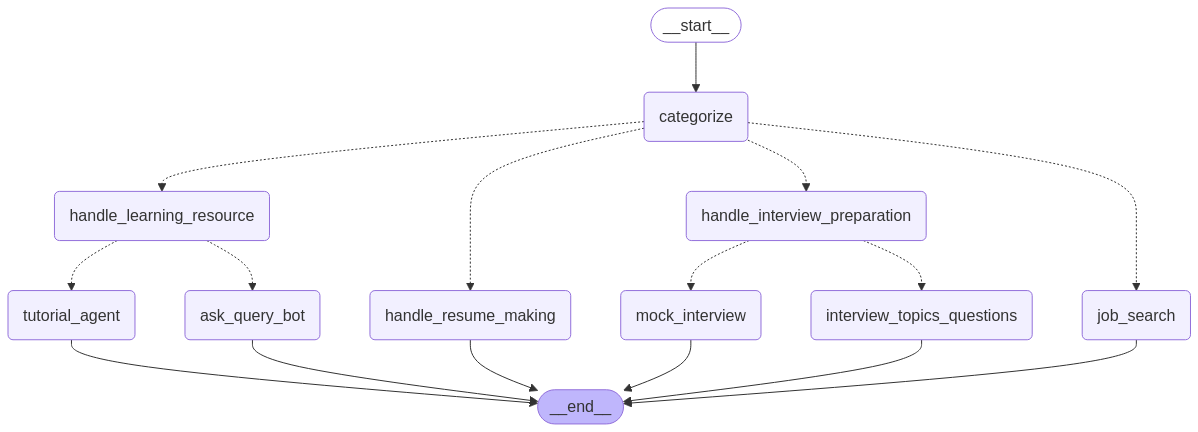

In [15]:
# Display the workflow graph as a PNG image using Mermaid
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,  # Uses Mermaid's API to generate the PNG image of the workflow graph
        )
    )
)


### Final function to Processes a user query using the LangGraph workflow and returns a dictionary containing the query's category and response.

In [16]:
def run_user_query(query: str) -> Dict[str, str]:
    """Process a user query through the LangGraph workflow.
    
    Args:
        query (str): The user's query
        
    Returns:
        Dict[str, str]: A dictionary containing the query's category and response
    """
    results = app.invoke({"query": query})
    return {
        "category": results["category"],
        "response": results["response"]
    }


# ---------------------------Testing Different Scenarios------------------------------

## TEST CASE 1: Creating Tutorials

In [17]:
query = "I want to learn Langchain and langgraph.With usage and concept. Also give coding example implementation for both.Create tutorial for this."
result = run_user_query(query)
result

Categorizing the customer query...
Category: handle_learning_resource
Categorizing the customer query further...
Category: tutorial_agent


> Entering new AgentExecutor chain...
# Introduction to Langchain and LangGraph

This tutorial introduces you to two incredible tools in the field of natural language processing—Langchain and LangGraph. We will learn the foundational concepts, usage, and a coding example for each. 

## Table of Contents
- What is Langchain?
- Getting Started with Langchain
- Code Example: Langchain
- What is LangGraph?
- Getting Started with LangGraph
- Code Example: LangGraph
- Conclusion
- References

## What is Langchain?

Langchain is a library designed for building, managing, and interacting with chainable natural language processing (NLP) workflows. It features tools to easily construct complex pipelines of text transformations and utilize pre-trained models for various tasks such as sentiment analysis, entity recognition, and machine translation.

### Key Fe

# Introduction to Langchain and LangGraph

This tutorial introduces you to two incredible tools in the field of natural language processing—Langchain and LangGraph. We will learn the foundational concepts, usage, and a coding example for each. 

## Table of Contents
- What is Langchain?
- Getting Started with Langchain
- Code Example: Langchain
- What is LangGraph?
- Getting Started with LangGraph
- Code Example: LangGraph
- Conclusion
- References

## What is Langchain?

Langchain is a library designed for building, managing, and interacting with chainable natural language processing (NLP) workflows. It features tools to easily construct complex pipelines of text transformations and utilize pre-trained models for various tasks such as sentiment analysis, entity recognition, and machine translation.

### Key Features of Langchain
- **Composable Pipelines**: Easily compose chains of transformations.
- **Integration with ML Models**: Utilize pre-trained models.
- **Flexibility**: Highly adaptive to custom pipelines.

### Getting Started with Langchain

To install Langchain, you can use pip:

```sh
pip install langchain
```

### Code Example: Langchain

```python
from langchain import TextProcessor

# Initialize a text processor
processor = TextProcessor()

# Define a transformation function
def to_uppercase(text):
    return text.upper()

# Add the transformation to the processor chain
processor.add_transformation(to_uppercase)

# Process some text
text = "Hello, this is a sample text."
processed_text = processor.process(text)

print(processed_text)  # Output: "HELLO, THIS IS A SAMPLE TEXT."
```

In this example, we define a simple transformation that converts text to uppercase and add it to a processing chain using Langchain.

## What is LangGraph?

LangGraph is a library for structuring and visualizing language models and their interactions. It provides tools to create graphs of models and illustrate their interplay, which is invaluable for conceptualizing complex NLP tasks.

### Key Features of LangGraph
- **Graphical Representation**: Build and visualize language model interactions.
- **Interoperability**: Work with various NLP frameworks.
- **Educational Utility**: Perfect for teaching and understanding model interrelations.

### Getting Started with LangGraph

To get started with LangGraph, install it using pip:

```sh
pip install langgraph
```

### Code Example: LangGraph

```python
from langgraph import Graph, Node

# Initialize a graph
graph = Graph()

# Define nodes representing NLP components
tokenizer_node = Node("Tokenizer")
sentiment_analysis_node = Node("Sentiment Analysis")
entity_recognition_node = Node("Entity Recognition")

# Connect nodes
graph.add_edge(tokenizer_node, sentiment_analysis_node)
graph.add_edge(tokenizer_node, entity_recognition_node)

# Visualize the graph
graph.visualize("nlp_graph")
```

In this code, we define a simple NLP graph where a tokenizer step feeds into both sentiment analysis and entity recognition stages, and we visualize it using LangGraph.

## Conclusion

Langchain and LangGraph are powerful tools for developing NLP workflows and understanding model interactions. Langchain excels in composability and pipeline creation, while LangGraph shines in visual representations, helping users grasp the intricacies of model interplay.

## References

- [Langchain Documentation](https://langchain.rtfd.io/)
- [LangGraph GitHub Repository](https://github.com/langgraph/langgraph)

Feel free to follow these references to dive deeper into the functionalities and use cases of Langchain and LangGraph.

{'category': 'Category: Tutorial',
 'response': 'Agent_output\\Tutorial_20250310142344.md'}

## TEST CASE 2: Q&A session for Doubts

In [18]:
query = "I am confused between Langgraph and CrewAI when to use what for Agent Creation?"
result = run_user_query(query)
print(result)

Categorizing the customer query...
Category: handle_learning_resource
Categorizing the customer query further...
Category: ask_query_bot

Starting the Q&A session. Type 'exit' to end the session.

**************************************************AGENT**************************************************

EXPERT AGENT RESPONSE: When deciding between LangGraph and CrewAI for agent creation, consider the following aspects that might help you make an informed decision:

### LangGraph

1. **Purpose and Use-Case**:
   - **LangGraph** is often designed for applications that require constructing complex dialogues or workflows that involve a structured flow of conversation.
   - Ideal for use cases where conversation logic is predefined and needs to be meticulously followed.

2. **Complexity and Control**:
   - Offers fine-grained control over conversation paths and can be useful when detailed management of dialogue flow is needed.

3. **Scalability**:
   - Well-suited for scalable environments w


YOUR QUERY:  exit


Ending the chat session.
File 'Agent_output\Q&A_Doubt_Session_20250310142451.md' created successfully.
Q&A Session saved to Agent_output\Q&A_Doubt_Session_20250310142451.md


User Query: I am confused between Langgraph and CrewAI when to use what for Agent Creation? 

Expert Response: When deciding between LangGraph and CrewAI for agent creation, consider the following aspects that might help you make an informed decision:

### LangGraph

1. **Purpose and Use-Case**:
   - **LangGraph** is often designed for applications that require constructing complex dialogues or workflows that involve a structured flow of conversation.
   - Ideal for use cases where conversation logic is predefined and needs to be meticulously followed.

2. **Complexity and Control**:
   - Offers fine-grained control over conversation paths and can be useful when detailed management of dialogue flow is needed.

3. **Scalability**:
   - Well-suited for scalable environments where multiple, interdependent dialogues need to operate in sync.

4. **Integration**:
   - May offer robust integration options with existing systems, especially if those systems are heavily reliant on structured dialogue management.

### CrewAI

1. **Purpose and Use-Case**:
   - **CrewAI** is often geared towards more dynamic interactions where creativity and adaptability are valued.
   - Ideal for scenarios where conversations need to be more fluid and adaptable to different conversational contexts.

2. **Flexibility**:
   - Provides greater flexibility for dynamic conversation scenarios and might be better suited where adaptability is key.

3. **Learning and Adaptation**:
   - Potentially offers more sophisticated learning algorithms that allow the agent to adapt better to unseen scenarios.

4. **Use of AI Techniques**:
   - CrewAI might employ advanced natural language processing (NLP) and machine learning models, making it suitable for more intelligent and evolving conversation systems.

### Decision Factors:

- **Requirements**: Consider the specific requirements of your application. If it needs structured dialogue, LangGraph might be better. If it needs adaptability, CrewAI could be more appropriate.

- **Integration Needs**: Evaluate which platform offers better integration with your existing architecture and tools.

- **Complexity vs. Flexibility**: Decide whether you need more control and predefined flows (LangGraph) or more flexibility and dynamic interaction management (CrewAI).

- **Volume and Scalability**: Consider how each platform handles scalability in your desired deployment scenarios.

It's crucial to align the choice of platform with your specific goals and technical requirements. You might also want to experiment with prototypes on both to see which aligns better with your project needs. 

User Query: When deciding between LangGraph and CrewAI for agent creation, consider the following aspects that might help you make an informed decision:

### LangGraph

1. **Purpose and Use-Case**:
   - **LangGraph** is often designed for applications that require constructing complex dialogues or workflows that involve a structured flow of conversation.
   - Ideal for use cases where conversation logic is predefined and needs to be meticulously followed.

2. **Complexity and Control**:
   - Offers fine-grained control over conversation paths and can be useful when detailed management of dialogue flow is needed.

3. **Scalability**:
   - Well-suited for scalable environments where multiple, interdependent dialogues need to operate in sync.

4. **Integration**:
   - May offer robust integration options with existing systems, especially if those systems are heavily reliant on structured dialogue management.

### CrewAI

1. **Purpose and Use-Case**:
   - **CrewAI** is often geared towards more dynamic interactions where creativity and adaptability are valued.
   - Ideal for scenarios where conversations need to be more fluid and adaptable to different conversational contexts.

2. **Flexibility**:
   - Provides greater flexibility for dynamic conversation scenarios and might be better suited where adaptability is key.

3. **Learning and Adaptation**:
   - Potentially offers more sophisticated learning algorithms that allow the agent to adapt better to unseen scenarios.

4. **Use of AI Techniques**:
   - CrewAI might employ advanced natural language processing (NLP) and machine learning models, making it suitable for more intelligent and evolving conversation systems.

### Decision Factors:

- **Requirements**: Consider the specific requirements of your application. If it needs structured dialogue, LangGraph might be better. If it needs adaptability, CrewAI could be more appropriate.

- **Integration Needs**: Evaluate which platform offers better integration with your existing architecture and tools.

- **Complexity vs. Flexibility**: Decide whether you need more control and predefined flows (LangGraph) or more flexibility and dynamic interaction management (CrewAI).

- **Volume and Scalability**: Consider how each platform handles scalability in your desired deployment scenarios.

It's crucial to align the choice of platform with your specific goals and technical requirements. You might also want to experiment with prototypes on both to see which aligns better with your project needs. 


{'category': 'Category: Question', 'response': 'Agent_output\\Q&A_Doubt_Session_20250310142451.md'}


## TEST CASE 3: Interview Question Discussion

In [24]:
query = "I want to discussion Interview question for Gen AI job roles."
result = run_user_query(query)
print(result)

Categorizing the customer query...
Category: handle_interview_preparation
Categorizing the customer query further...
Category: interview_topics_questions

Starting the Interview question preparation. Type 'exit' to end the session.



> Entering new AgentExecutor chain...
Sure! When it comes to interviews for Generative AI job roles, the questions can span several domains, such as deep learning principles, natural language processing, computer vision, model optimization, and ethics in AI. Here are some common question categories we might explore:

1. **Fundamentals of Machine Learning and Deep Learning:**
   - Explain the difference between supervised, unsupervised, and reinforcement learning. How can each be applied to generative models?
   - Describe the architecture and functioning of a GAN. What are its primary components?
   - What's the role of the discriminator in a Generative Adversarial Network (GAN)?

2. **Generative Models:**
   - How do Variational Autoencoders (VAEs) diffe

You:  exit



Starting the Interview question preparation. Type 'exit' to end the session.

Ending the conversation. Goodbye!
File 'Agent_output\Interview_questions_20250310142126.md' created successfully.
Interviews question saved to Agent_output\Interview_questions_20250310142126.md


Sure! When it comes to interviews for Generative AI job roles, the questions can span several domains, such as deep learning principles, natural language processing, computer vision, model optimization, and ethics in AI. Here are some common question categories we might explore:

1. **Fundamentals of Machine Learning and Deep Learning:**
   - Explain the difference between supervised, unsupervised, and reinforcement learning. How can each be applied to generative models?
   - Describe the architecture and functioning of a GAN. What are its primary components?
   - What's the role of the discriminator in a Generative Adversarial Network (GAN)?

2. **Generative Models:**
   - How do Variational Autoencoders (VAEs) differ from GANs?
   - Explain the concept and applications of Transformer models in generating text.
   - What are some common challenges when training generative models, and how can they be addressed?

3. **Natural Language Processing (NLP):**
   - Describe the role of attention mechanisms in NLP models.
   - How has the BERT model influenced generative AI, particularly in generating human-like text?

4. **Optimization and Evaluation:**
   - How do you evaluate the performance of a generative model?
   - Discuss techniques for improving the convergence speed of GANs.

5. **Ethical and Practical Considerations:**
   - What are the ethical concerns associated with generative AI models?
   - How would you address issues related to biased data in training generative models?

6. **Applications and Case Studies:**
   - Can you give examples of successful applications of generative AI in real-world scenarios?
   - Discuss a generative AI project you've worked on and the challenges you encountered.

7. **Technical Skills and Tools:**
   - Which programming languages are you proficient in for developing generative AI solutions?
   - What platforms or frameworks do you prefer for building and deploying generative models, and why?

Would you like questions in a specific area, or should we expand on these queries with more depth or specific examples?


{'category': 'Category: Question', 'response': 'Agent_output\\Interview_questions_20250310142126.md'}


## TEST CASE 4: Mock Interview with Evaluation Feedback

In [61]:
query = "I need mock interview to practice."
result = run_user_query(query)
result

Categorizing the customer query...
Category: handle_interview_preparation
Categorizing the customer query further...
Category: mock_interview

Starting the mock interview. Type 'exit' to end the session.


Interviewer: Great! Welcome.  My name is Alex, and I'll be conducting your interview today for the Generative AI Engineer position.  Let's start with a brief introduction from you. Tell me about yourself and your experience relevant to this role.  We have your resume, but I'd like to hear it in your own words.  Keep it to about 2-3 minutes.




Candidate:  I’m Karan, and I’m currently focused on advancing my skills and contributions in Generative AI. My journey started with a solid foundation in Computer Science, where I developed a strong interest in AI and machine learning. Over the years, I’ve built a range of projects that have helped me gain expertise in several core areas of this role.  One of my most impactful experiences was working on an end-to-end Legal Case Identification system for Verinext and Pondlehocky. This project involved integrating Gen-AI to automate case assignments. I led a team to develop a pipeline that included NLP, GPT, prompt engineering, and Litify DB integration, ultimately enabling efficient case handling through an AI-driven model.  I’ve also worked on an Automatic Number Plate Recognition project for NPCI. This required designing and deploying a real-time ANPR solution using transfer learning, Deepstream, and OCR. I collaborated closely with my team on model improvement and pipeline optimizat


Interviewer: That's a strong introduction, Karan.  Your projects demonstrate a good understanding of the practical applications of Generative AI. Let's delve a bit deeper.  You mentioned prompt engineering in your Legal Case Identification project. Can you describe a challenging prompt engineering problem you faced and how you solved it?  What metrics did you use to evaluate the success of your prompt engineering efforts?




Candidate:  Certainly, Alex.  In the Legal Case Identification project, a significant challenge in prompt engineering arose when trying to accurately classify complex case types from unstructured legal data. The prompts needed to be crafted carefully to balance specificity with flexibility, as the language in legal documents can vary widely. One particular issue was handling nuanced legal terms and context-specific language that often influenced the interpretation of a case’s category.  To address this, I experimented with structured prompt templates that included both contextual keywords and specific qualifiers. For example, rather than just asking the model to classify a "personal injury" case, I structured prompts to include additional context like, "Identify if this case involves physical harm due to an accident or negligence," which guided the model to focus on relevant legal scenarios.  For evaluation, I used precision, recall, and F1 scores to measure how accurately the prompts


Interviewer: Excellent.  That demonstrates a good understanding of prompt engineering and evaluation metrics.  Now, let's shift gears slightly.  Generative AI models can sometimes produce biased or inaccurate outputs.  How would you address such issues in a production environment?






Candidate:  Thank you, Alex; that’s an important consideration.  In a production environment, handling bias and inaccuracies in Generative AI outputs requires a proactive, multi-layered approach. Here’s how I’d approach it:  Data and Model Auditing: I’d start by auditing the training data to identify and mitigate any inherent biases. This might involve using a diverse dataset or adding counterexamples to balance the perspectives presented in the model’s outputs. Model fine-tuning can help adjust any biases found in pre-trained models by focusing on more representative or neutral datasets.  Prompt Design and Constraints: In prompt engineering, I’d craft prompts that guide the model toward neutral and accurate responses. For instance, setting constraints in the prompt to avoid speculative or potentially biased language can help. Additionally, I’d use prompt templates that explicitly frame questions to elicit factual and context-appropriate information.  Post-Processing and Filtering: Af


Interviewer: Good.  You've covered some key aspects.  One last question:  Describe your preferred approach to staying up-to-date with the rapidly evolving field of Generative AI.





Candidate:  To stay current in Generative AI, I rely on a structured approach that combines both learning from established resources and exploring emerging trends:  Research Papers and Journals: I regularly read papers from sources like arXiv and conferences such as NeurIPS, ICML, and CVPR. Following key researchers and institutions helps me stay updated on cutting-edge techniques, and I make it a habit to read and analyze at least one new paper each week, focusing on both theoretical advances and practical applications.  Community and Open-Source Contributions: I participate in open-source projects on platforms like GitHub, which keeps me connected with the latest tools and libraries. Additionally, contributing to or following repositories in frameworks like Hugging Face or PyTorch gives me hands-on exposure to practical advancements in model development and deployment.  Online Courses and Workshops: I engage in online courses or certifications, especially when new architectures or m


Interviewer: Excellent. Thank you, Karan. That concludes our interview.  I appreciate you taking the time to speak with me today.


**Evaluation:**

Karan demonstrated a strong understanding of Generative AI concepts and their practical application. His project descriptions were detailed and showcased his ability to tackle complex problems and evaluate results effectively.  He articulated a well-rounded approach to addressing bias and maintaining accuracy in production environments. His commitment to continuous learning is also commendable. While he could have provided more specific examples in some areas, overall, he presented himself as a strong candidate for the Generative AI Engineer position.  I would recommend him for the next stage of the interview process.




Candidate:  exit


Ending the interview session.
File 'Agent_output\Mock_Interview_20241117174111.md' created successfully.
Mock Interview saved to Agent_output\Mock_Interview_20241117174111.md


Candidate: I am ready for the interview.
 

Interviewer: Great! Welcome.  My name is Alex, and I'll be conducting your interview today for the Generative AI Engineer position.  Let's start with a brief introduction from you. Tell me about yourself and your experience relevant to this role.  We have your resume, but I'd like to hear it in your own words.  Keep it to about 2-3 minutes.
 

Candidate: I’m Karan, and I’m currently focused on advancing my skills and contributions in Generative AI. My journey started with a solid foundation in Computer Science, where I developed a strong interest in AI and machine learning. Over the years, I’ve built a range of projects that have helped me gain expertise in several core areas of this role.  One of my most impactful experiences was working on an end-to-end Legal Case Identification system for Verinext and Pondlehocky. This project involved integrating Gen-AI to automate case assignments. I led a team to develop a pipeline that included NLP, GPT, prompt engineering, and Litify DB integration, ultimately enabling efficient case handling through an AI-driven model.  I’ve also worked on an Automatic Number Plate Recognition project for NPCI. This required designing and deploying a real-time ANPR solution using transfer learning, Deepstream, and OCR. I collaborated closely with my team on model improvement and pipeline optimization to ensure the project could effectively replace existing toll services.  Beyond my technical skills, I bring a strategic approach to problem-solving and a knack for diving into the nuances of machine learning models, optimizing them to fit specific business needs. I’m passionate about harnessing AI to address real-world challenges, and I’m excited about the possibility of contributing my skills and learning further with your team. 

Interviewer: That's a strong introduction, Karan.  Your projects demonstrate a good understanding of the practical applications of Generative AI. Let's delve a bit deeper.  You mentioned prompt engineering in your Legal Case Identification project. Can you describe a challenging prompt engineering problem you faced and how you solved it?  What metrics did you use to evaluate the success of your prompt engineering efforts?
 

Candidate: Certainly, Alex.  In the Legal Case Identification project, a significant challenge in prompt engineering arose when trying to accurately classify complex case types from unstructured legal data. The prompts needed to be crafted carefully to balance specificity with flexibility, as the language in legal documents can vary widely. One particular issue was handling nuanced legal terms and context-specific language that often influenced the interpretation of a case’s category.  To address this, I experimented with structured prompt templates that included both contextual keywords and specific qualifiers. For example, rather than just asking the model to classify a "personal injury" case, I structured prompts to include additional context like, "Identify if this case involves physical harm due to an accident or negligence," which guided the model to focus on relevant legal scenarios.  For evaluation, I used precision, recall, and F1 scores to measure how accurately the prompts identified cases correctly across categories. Additionally, we monitored the model’s consistency by testing it on a set of challenging cases with subtle differences to see if the prompts led to consistent responses. I also tracked user feedback from legal experts who verified if the classifications aligned with practical expectations.  This iterative approach, along with close collaboration with subject matter experts, allowed me to refine prompts effectively. It was a great learning experience in balancing prompt detail and adaptability while ensuring reliable, high-quality results for the client. 

Interviewer: Excellent.  That demonstrates a good understanding of prompt engineering and evaluation metrics.  Now, let's shift gears slightly.  Generative AI models can sometimes produce biased or inaccurate outputs.  How would you address such issues in a production environment?


 

Candidate: Thank you, Alex; that’s an important consideration.  In a production environment, handling bias and inaccuracies in Generative AI outputs requires a proactive, multi-layered approach. Here’s how I’d approach it:  Data and Model Auditing: I’d start by auditing the training data to identify and mitigate any inherent biases. This might involve using a diverse dataset or adding counterexamples to balance the perspectives presented in the model’s outputs. Model fine-tuning can help adjust any biases found in pre-trained models by focusing on more representative or neutral datasets.  Prompt Design and Constraints: In prompt engineering, I’d craft prompts that guide the model toward neutral and accurate responses. For instance, setting constraints in the prompt to avoid speculative or potentially biased language can help. Additionally, I’d use prompt templates that explicitly frame questions to elicit factual and context-appropriate information.  Post-Processing and Filtering: After generating outputs, I’d implement a filtering or post-processing layer that flags any content that seems potentially biased or incorrect. For example, sentiment analysis or bias detection algorithms can help flag outputs, allowing for an additional layer of human review or correction before the final output is published. 

Interviewer: Good.  You've covered some key aspects.  One last question:  Describe your preferred approach to staying up-to-date with the rapidly evolving field of Generative AI.

 

Candidate: To stay current in Generative AI, I rely on a structured approach that combines both learning from established resources and exploring emerging trends:  Research Papers and Journals: I regularly read papers from sources like arXiv and conferences such as NeurIPS, ICML, and CVPR. Following key researchers and institutions helps me stay updated on cutting-edge techniques, and I make it a habit to read and analyze at least one new paper each week, focusing on both theoretical advances and practical applications.  Community and Open-Source Contributions: I participate in open-source projects on platforms like GitHub, which keeps me connected with the latest tools and libraries. Additionally, contributing to or following repositories in frameworks like Hugging Face or PyTorch gives me hands-on exposure to practical advancements in model development and deployment.  Online Courses and Workshops: I engage in online courses or certifications, especially when new architectures or methodologies gain traction, such as diffusion models or prompt engineering techniques. Platforms like Coursera and specialized workshops provide structured, in-depth content that complements hands-on experience.  Podcasts and Newsletters: I subscribe to AI-focused newsletters like "The Batch" by Andrew Ng and listen to podcasts such as "Lex Fridman" and "Data Skeptic," which often feature industry experts discussing the latest trends and breakthroughs. This is a great way to get a broader perspective on AI developments and practical applications. 

Interviewer: Excellent. Thank you, Karan. That concludes our interview.  I appreciate you taking the time to speak with me today.


**Evaluation:**

Karan demonstrated a strong understanding of Generative AI concepts and their practical application. His project descriptions were detailed and showcased his ability to tackle complex problems and evaluate results effectively.  He articulated a well-rounded approach to addressing bias and maintaining accuracy in production environments. His commitment to continuous learning is also commendable. While he could have provided more specific examples in some areas, overall, he presented himself as a strong candidate for the Generative AI Engineer position.  I would recommend him for the next stage of the interview process.
 

Candidate: exit 


{'category': 'Category: Mock\n',
 'response': 'Agent_output\\Mock_Interview_20241117174111.md'}

Ending the conversation. Goodbye!
File 'Agent_output\Interview_questions_20241117005746.md' created successfully.


To best help you prepare for your Generative AI interview, I need some more information.  Please tell me:

1. **What is your target role?** (e.g., Research Scientist, Software Engineer, Product Manager, etc.)  The questions will vary significantly depending on the role.

2. **What is your experience level?** (e.g., Intern, Junior, Mid-level, Senior)  This will help tailor the difficulty of the questions.

3. **Which specific Generative AI areas are you most familiar with?** (e.g., Large Language Models, Diffusion Models, Generative Adversarial Networks, etc.)  Focusing on your strengths will maximize your chances of success.

4. **Are there any specific companies or teams you're interviewing with?** Knowing the company's focus can help me tailor the questions to their specific interests.


Once I have this information, I can generate a list of relevant interview questions and potential answers, along with references and links to helpful resources.  I will organize this into a markdown (.md) file.
Okay, given that you're a mid-level Generative AI Engineer focusing on LLMs, GANs, NLP, and ML, I can create a tailored set of interview questions.  I will categorize them for clarity.  Note that some questions may touch upon multiple areas.  I won't provide complete answers here, as that would be too extensive, but I'll give you pointers to guide your preparation.


# Generative AI Engineer Interview Questions (Mid-Level)

This document outlines potential interview questions for a mid-level Generative AI Engineer role, focusing on LLMs, GANs, NLP, and ML.  Remember to tailor your answers to your specific experiences and projects.

## I. Large Language Models (LLMs)

**A. Foundational Understanding:**

1. **Explain the architecture of a Transformer network.  Discuss the role of self-attention and its computational complexity.**  *(Focus on encoder-decoder structure, attention mechanisms, positional encoding, and computational challenges like quadratic complexity with naive attention.)*

2. **Compare and contrast different LLM architectures (e.g., GPT, BERT, T5).  Highlight their strengths and weaknesses for different tasks.** *(Consider differences in training objectives, autoregressive vs. masked language modeling, and suitability for various NLP tasks.)*

3. **What are some common challenges in training LLMs? Discuss methods to mitigate issues like vanishing gradients, overfitting, and catastrophic forgetting.** *(Address gradient clipping, regularization techniques, transfer learning, and continual learning strategies.)*


**B. Advanced Topics & Applications:**

4. **Describe different methods for prompting LLMs to improve performance and control the generated text.  Give examples of few-shot, zero-shot, and chain-of-thought prompting.** *(Discuss prompt engineering techniques, including various prompting strategies and their effectiveness.)*

5. **Explain how reinforcement learning can be used to fine-tune LLMs.  Discuss the role of reward models and algorithms like Proximal Policy Optimization (PPO).** *(Focus on RLHF (Reinforcement Learning from Human Feedback) and its application in aligning LLMs with human preferences.)*

6. **Discuss the ethical considerations surrounding LLMs, such as bias, toxicity, and misinformation.  How can these issues be addressed?** *(Consider bias mitigation techniques, safety guidelines, and responsible AI practices.)*

7. **Describe your experience with specific LLM frameworks (e.g., Hugging Face Transformers, TensorFlow, PyTorch).** *(Highlight your practical experience with these frameworks and any relevant projects.)*


## II. Generative Adversarial Networks (GANs)

**A. Core Concepts:**

1. **Explain the architecture and training process of a GAN. Describe the roles of the generator and discriminator.** *(Focus on the minimax game, backpropagation, and the adversarial training process.)*

2. **What are some common problems encountered when training GANs (e.g., mode collapse, vanishing gradients)?  How can these be addressed?** *(Discuss techniques like Wasserstein GANs (WGANs), gradient penalty, and spectral normalization.)*

3. **Compare and contrast different GAN architectures (e.g., DCGAN, StyleGAN, CycleGAN).  Discuss their applications and advantages.** *(Highlight architectural differences and their impact on generated output quality and diversity.)*


**B. Advanced Topics & Applications:**

4. **Explain how GANs can be used for image generation, image-to-image translation, and other generative tasks.** *(Provide specific examples and discuss the effectiveness of GANs in these applications.)*

5. **Describe your experience with GAN training and optimization techniques. Discuss your experience with hyperparameter tuning and model evaluation metrics.** *(Highlight your practical experience and the tools/techniques used.)*


## III. Natural Language Processing (NLP) and Machine Learning (ML)

**A. NLP Techniques:**

1. **Describe different NLP techniques used in preprocessing text data (e.g., tokenization, stemming, lemmatization).** *(Explain the purpose and impact of each technique.)*

2. **Explain various word embedding techniques (e.g., Word2Vec, GloVe, FastText).  Discuss their strengths and weaknesses.** *(Focus on the underlying algorithms and their representational capabilities.)*

3. **Discuss different sequence-to-sequence models and their applications in machine translation and text summarization.** *(Explain the encoder-decoder architecture and its use in these tasks.)*


**B. ML Fundamentals:**

1. **Explain different types of machine learning algorithms (e.g., supervised, unsupervised, reinforcement learning).** *(Provide examples and discuss their use cases.)*

2. **Describe different model evaluation metrics (e.g., precision, recall, F1-score, AUC).** *(Explain the meaning and interpretation of these metrics.)*

3. **Discuss your experience with model deployment and monitoring.** *(Highlight your practical experience in deploying models to production environments.)*


## IV.  Project & Experience Based Questions

1. **Describe a challenging project you worked on involving generative AI.  What were the key challenges, and how did you overcome them?**  *(Focus on a project that showcases your technical skills and problem-solving abilities.)*

2. **Discuss your experience with version control (e.g., Git) and collaborative development.** *(Highlight your teamwork skills and experience with collaborative tools.)*

3. **How do you stay up-to-date with the latest advancements in generative AI?** *(Discuss your approach to continuous learning and staying current in the field.)*


This comprehensive list should provide a strong foundation for your interview preparation. Remember to practice explaining your projects and technical concepts clearly and concisely. Good luck!
Let's focus on a few crucial topics and provide more detailed answers, keeping in mind the mid-level Generative AI Engineer role and your expertise in LLMs, GANs, NLP, and ML.  Remember that these are examples, and your answers should reflect your own experiences and understanding.

**I.  LLMs:  Addressing Bias in LLMs**

**Question:**  "Large language models are known to exhibit biases present in their training data.  Describe several techniques used to mitigate bias in LLMs, and discuss their limitations."

**Answer:**  "Mitigating bias in LLMs is a complex and ongoing challenge.  Several strategies exist, each with limitations:

* **Data Preprocessing:** Carefully curating the training data to remove or rebalance biased content.  This is resource-intensive and might not completely eliminate subtle biases.  Furthermore, identifying and removing all biased content is very difficult.

* **Algorithmic Mitigation:**  Techniques like adversarial training can be employed.  This involves training a separate model to identify and counteract bias during the LLM's training.  However, designing effective adversarial training methods is challenging, and it's difficult to ensure complete bias removal.

* **Post-Processing Techniques:**  These methods filter or modify the LLM's output after generation to reduce bias.  Examples include re-ranking generated responses based on fairness metrics or using classifiers to identify and flag biased text.  The drawback is that these methods might impact the fluency or coherence of the generated text.

* **Reinforcement Learning from Human Feedback (RLHF):**  This approach involves training a reward model that ranks responses based on their fairness and lack of bias.  The LLM is then fine-tuned using this reward model via reinforcement learning. While effective, it requires significant human effort to create and evaluate the reward model, and human biases can still creep in.

* **Fairness-Aware Metrics:**  Developing and using metrics that specifically quantify bias in LLM outputs is crucial.  This allows for better monitoring and evaluation of bias mitigation techniques.  However, designing truly comprehensive and unbiased metrics remains an area of active research.

In summary, mitigating bias in LLMs is a multifaceted problem requiring a combination of approaches.  No single technique is a silver bullet, and continuous research is necessary to develop more effective and robust methods."


**II. GANs:  Mode Collapse and its Solutions**

**Question:** "Explain the phenomenon of 'mode collapse' in GAN training.  Describe at least three different techniques to mitigate mode collapse."

**Answer:** "Mode collapse in GANs occurs when the generator learns to produce only a limited set of outputs, failing to capture the full diversity of the data distribution.  This results in the generator producing similar samples repeatedly, even when the input noise varies.  Several methods address this:

* **Improved Architectures:**  Using architectures like Wasserstein GANs (WGANs) or improved versions like WGAN-GP (WGAN with Gradient Penalty) often helps.  These methods use different loss functions that encourage the discriminator to provide more informative gradients, thus preventing the generator from getting stuck in local optima.

* **Regularization Techniques:**  Applying regularization techniques such as spectral normalization to the discriminator or weight clipping in WGANs can stabilize training and reduce mode collapse.  These methods constrain the discriminator's behavior, preventing it from becoming too powerful and overwhelming the generator.

* **Mini-batch Discrimination:**  This technique involves feeding mini-batches of generated samples to the discriminator simultaneously.  This allows the discriminator to compare generated samples with each other, encouraging the generator to produce more diverse outputs.

* **Label Smoothing:**  Adding noise to the discriminator's labels during training can help improve the stability of training and reduce mode collapse.

* **Two Timescale Update Rule (TTUR):** This method uses different learning rates for the generator and the discriminator, often leading to more stable training dynamics.


The choice of technique often depends on the specific GAN architecture and dataset.  A combination of methods is often most effective."


**III. NLP & ML:  Explainable AI (XAI) in NLP**

**Question:** "Explain the importance of explainable AI (XAI) in NLP, particularly in the context of LLMs.  Describe some techniques used to make NLP models more interpretable."

**Answer:** "Explainability is crucial in NLP, especially with complex models like LLMs, because it increases trust, facilitates debugging, and allows for better model understanding and improvement.  Opaque models make it difficult to identify biases, errors, or unexpected behaviors.  Several techniques promote interpretability:

* **Attention Mechanisms:**  Analyzing the attention weights in Transformer networks provides insights into which parts of the input sequence the model focuses on when generating output.  This can reveal the model's reasoning process.

* **Saliency Maps:**  These highlight the input features that most influence the model's prediction.  In NLP, this could show which words or phrases are most important for a particular classification or generation task.

* **Feature Importance Analysis:**  Techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) can be used to quantify the contribution of individual features (words, phrases, etc.) to the model's prediction.

* **Rule Extraction:**  For simpler models, rules can be extracted directly from the model's parameters, providing a more explicit representation of the model's decision-making process.

* **Probing Classifiers:**  Training separate classifiers to predict specific aspects of the model's internal representations can reveal what information the model learns and how it uses it.


While these methods offer insights, perfect explainability is often challenging to achieve, especially with highly complex models.  The choice of technique depends on the specific model and the desired level of interpretability."


These expanded answers provide a more thorough response to common interview questions.  Remember to adapt them to your own experiences and projects.  Good luck!


{'category': 'Category: Question\n',
 'response': 'Agent_output\\Interview_questions_20241117005746.md'}

## TEST CASE 5: Resume Modification Based on Job Description

In [55]:
query = "Can you help me to modify my resume based on job description"
result = run_user_query(query)
result

Categorizing the customer query...
Category: handle_resume_making

Starting the Resume create session. Type 'exit' to end the session.



> Entering new AgentExecutor chain...
I can definitely help you with that! To tailor your resume effectively, I'll need some information from you. First, could you please share:

1. Your current resume (in any format).
2. The job description of the role you're targeting.
3. Your LinkedIn profile URL (optional).


> Finished chain.


You:  SKILLS:   Technical skills:   • Demonstrated work experience with natural language processing techniques to drive business value. Experience building user-centric AI products/features is highly valuable.    • Knowledge in Hypothesis testing, Statistical Methods, Sampling Theory, Experimental Design    • Familiarity with common advanced analysis tools – SQL & Python/R    • Demonstrated familiarity (work experience, GitHub account) with OOP concepts. Expertise in Python is a big plus.    • Experience with cloud computing (AWS) & MLOps is a plus.    • Strong knowledge of Machine Learning & Deep Learning   Soft/Leadership skills:   • Use business acumen and analytical skills to identify opportunities, estimate potential, layout strategy roadmaps to solve complex business problems.    • Be motivated to explore and identify opportunities from scratch by thinking backwards on problem solving by putting users and data at the center of analysis and decision making.    • Be responsible for


Starting the Resume create session. Type 'exit' to end the session.



> Entering new AgentExecutor chain...
```markdown
# Karan Shrestha
[LinkedIn](LinkedIn) | 747-295-9996 | ks.karanshrestha@gmail.com | [GitHub](GitHub)

## Summary

Highly motivated and results-oriented Data Scientist with 4.5 years of experience specializing in Machine Learning, Natural Language Processing (NLP), Deep Learning, Generative AI, and Prompt Engineering. Proven ability to leverage data-driven insights to solve complex business problems, with a strong focus on building user-centric AI products. Expertise in Python, cloud computing (AWS), and MLOps, along with excellent communication and teamwork skills.  Passionate about exploring and identifying opportunities to improve customer experiences through innovative AI solutions.

## Skills

**Technical Skills:** Python, SQL, C#, TensorFlow, PyTorch, NumPy, NLTK, Pandas, Scikit-learn, Transformers, MXNet, Keras, Deep Learning, CNN, RNN, LSTM, Computer Vision, 

You:  exit



Starting the Resume create session. Type 'exit' to end the session.

Ending the conversation. Goodbye!
File 'Agent_output\Resume_20241117173459.md' created successfully.
Resume saved to Agent_output\Resume_20241117173459.md


# Karan Shrestha
[LinkedIn](LinkedIn) | 747-295-9996 | ks.karanshrestha@gmail.com | [GitHub](GitHub)

## Summary

Highly motivated and results-oriented Data Scientist with 4.5 years of experience specializing in Machine Learning, Natural Language Processing (NLP), Deep Learning, Generative AI, and Prompt Engineering. Proven ability to leverage data-driven insights to solve complex business problems, with a strong focus on building user-centric AI products. Expertise in Python, cloud computing (AWS), and MLOps, along with excellent communication and teamwork skills.  Passionate about exploring and identifying opportunities to improve customer experiences through innovative AI solutions.

## Skills

**Technical Skills:** Python, SQL, C#, TensorFlow, PyTorch, NumPy, NLTK, Pandas, Scikit-learn, Transformers, MXNet, Keras, Deep Learning, CNN, RNN, LSTM, Computer Vision, Anomaly Detection, AWS, JavaScript, REST API, LLMs (Large Language Models), Generative AI, Prompt Engineering, Fine-tuning, PySpark, GCP, Azure,  Statistics, Statistical Modeling, R, Neo4j

**Soft/Leadership Skills:**  Problem-solving, Business Acumen, Analytical Skills, Strategic Planning, Communication (Written & Verbal), Teamwork, Time Management,  Product Vision, Cross-functional Collaboration, Data Visualization (Tableau, Power BI)


## Experience

**Senior Data Scientist, FreightMango, Gurgaon, India (06/2023 – 12/2023)**

* Engineered an automated customer quotation document scanning pipeline using OCR and NLP, resulting in a 40% increase in customer acquisition.
* Applied Machine Learning (ML) algorithms to optimize finance-related applications, improving the accuracy and efficiency of financial forecasting models.
* Developed and maintained information systems for managing and processing large datasets for machine learning projects.
* Conducted research on industry trends and applied findings to product innovation, driving the product vision and ensuring alignment with business goals.
* Implemented networking protocols and ensured robust product security.
* Collaborated with cross-functional teams to develop innovative solutions and improve core functionalities.
* Managed social media campaigns, increasing engagement by 30% through targeted content strategies.

**Software Engineer, DataNova, Noida, India (02/2019 - 06/2023)**

* Developed and delivered pre-trained and fine-tuned neural network models using TensorFlow for internal projects, including object detection and automated chatbots using NLP.
* Collaborated with cross-functional teams to deploy machine learning solutions, enhancing performance for perception tasks like object detection.
* Developed predictive models using algorithms such as Kernel-KNN, Decision Trees, Random Forest, Gradient Boosting, SVMs, and XGBoost.
* Conducted image annotation, text data cleaning, text vectorization, and data preprocessing for machine learning projects.
* Created data visualizations to support data-driven decisions.
* Contributed to the development of ML models and their integration into the product.
* Regularly monitored and fine-tuned machine learning models and data pipelines to ensure optimal performance and accuracy.


## Education

**Master of Science in Computer Science (3.93 GPA), San Francisco Bay University, Fremont, CA, USA (01/2024 – Present)**

**Bachelor of Science in Computer Science & Engineering (3.62 GPA), ITS Engineering College, Greater Noida, India (05/2015 - 06/2019)**


## Projects

* **Wafer Sensor Fault Classification:** Developed a machine learning model using Random Forest Classifier and K-Means++ Clustering to predict wafer quality based on sensor data.
* **Hand Detection - Shredder Machine:** Implemented a real-time hand detection system using TensorFlow Object Detection framework (SSDlite) to prevent workplace injuries.
* **ANPR (Automatic Number Plate Recognition):** Developed an end-to-end ANPR system for NPCI using computer vision, transfer learning, and deep learning techniques.
* **Verinext (PondLehocky) on Project Legal-Case-Identification (LCI):** Developed a Gen-AI solution using NLP, GPT, and Prompt Engineering to automate legal case assignments.
* **FM Quotation Request - OCR:** Built an automated OCR model using NLP and Spacy to extract information from quotation documents and streamline the request process.
* **Concrete Strength Prediction:** Developed a regression model using XGBoost Regressor to predict concrete compressive strength based on mixture components.
* **Webshop - Customer Reviews Sentiments:** Implemented a sentiment analysis model using NLP techniques to classify customer reviews and generate reports.

## Mentorship

* **Data Science Tutor:** Provided tutoring in Programming, Data Science, Machine Learning, and Data Visualization.

## Certifications

* **Oracle Cloud Infrastructure 2024 Generative AI Certified Professional:** [Link](Link)
* **Gold Badge (5 Star) for Python on HackerRank:** [Link]
* **Data Scientist 1-year Master Professional Program:** [Link]
* **Certificate of Training in Machine Learning Advanced Course:** [Link]

```

{'category': '2\n', 'response': 'Agent_output\\Resume_20241117173459.md'}

## TEST CASE 6: Resume Making

In [50]:
query = "I want to make resume for Gen AI roles job."
result = run_user_query(query)
result

Categorizing the customer query...
Category: handle_resume_making

Starting the Resume create session. Type 'exit' to end the session.



> Entering new AgentExecutor chain...
I can definitely help you with that! To create a tailored resume for Generative AI roles, I need some information from you.  Could you please tell me about your technical skills related to AI/ML and Generative AI in particular?  For example, list specific programming languages, platforms, libraries, and tools you're proficient in (e.g., Python, TensorFlow, PyTorch, Transformers, LangChain, etc.).


> Finished chain.


You:  Skills ____________________________________________________________________________________________ • Python | SQL | C# | Tensorflow | Pytorch | Numpy | NLTK | Pandas | Natural Language Processing | Machine Learning| Database query | • Computer Vision | Transformers | MXNet | Deep Learning | Anomaly detection | Scikit-learn | CNN | RNN | LSTM -Neural networks | • AWS | JavaScript | REST API | LLMs-Large Language Models | Keras | Predictive Modeling | Generative AI | Prompt Engineering | Neo4j • Tableau | Power BI | Fine Tuning | Problem solving | Web Development | PySpark | GCP | Azure | Statistics | Statistical modeling | R



Starting the Resume create session. Type 'exit' to end the session.



> Entering new AgentExecutor chain...
Great!  Now, please tell me about your work experience and projects, focusing on those relevant to Generative AI.  For each experience/project, please provide a brief description, highlighting your contributions and the technologies used.  If you have any publications or patents, please mention those as well.  If you're a fresh graduate or have no direct experience, describe relevant academic projects or coursework.


> Finished chain.


You:  Experience _______________________________________________________________________________________ Senior Data Scientist FreightMango Gurgaon, India 06/2023 – 12/2023 • Applied data preprocessing techniques, including data collection and cleaning, to prepare datasets for Machine learning models. • Tuned and optimized datasets through advanced data preprocessing techniques for machine learning models. • Engineered an automated customer quotation document scanning pipeline, boosting customer acquisition by 40%. • Drive the vision of the product, ensuring alignment with business goals. Implement networking protocols and ensure robust product security. Conducted research to identify industry trends, applying findings to product innovation. • Applied machine learning (ML) algorithms to optimize finance-related applications, enhancing the accuracy and efficiency of financial forecasting models.Software Engineer DataNova Noida, India 02/2019 - 06/2023 • Conducted image annotation, text 


Starting the Resume create session. Type 'exit' to end the session.



> Entering new AgentExecutor chain...
Okay, that's a good start.  Finally, could you please provide your education details (degrees, university, graduation dates), any relevant certifications (e.g., AWS Certified Machine Learning – Specialty), and your contact information (name, phone number, email, LinkedIn profile URL if you have one)?  You can replace your actual contact information with placeholders if you prefer not to share it here.



> Finished chain.


You:  Education ________________________________________________________________________________________ Master of Science San Francisco Bay University Fremont, CA, USA 01/2024 - Present • Major in Computer Science (3.93 GPA) Bachelor of Science ITS Engineering College Greater Noida, India 05/2015 - 06/2019 • Major in Computer Science & Engineering (3.62 GPA)



Starting the Resume create session. Type 'exit' to end the session.



> Entering new AgentExecutor chain...
```markdown
# [Your Name]
[Phone Number] | [Email Address] | [LinkedIn Profile URL]

## Summary

Highly motivated and results-oriented AI Engineer with a proven track record in developing and deploying Generative AI solutions. Expertise in leveraging cutting-edge technologies like LLMs, Transformers, and Deep Learning to solve complex business problems. Passionate about building innovative and impactful AI-driven applications.

## Skills

**Programming Languages:** Python, SQL, C#, JavaScript, R
**AI/ML Libraries & Frameworks:** TensorFlow, PyTorch, Keras, Scikit-learn, Transformers, LangChain, NLTK, Pandas, NumPy, MXNet
**Cloud Platforms:** AWS, GCP, Azure
**Databases:** SQL, Neo4j
**Other Tools & Technologies:**  Computer Vision, CNN, RNN, LSTM, Natural Language Processing (NLP), Deep Learning, Predictive Modeling, Generative AI, Prompt Engineering, Fine-tuning, REST API, Tab

You:  exit



Starting the Resume create session. Type 'exit' to end the session.

Ending the conversation. Goodbye!
File 'Agent_output\Resume_20241117162047.md' created successfully.
Resume saved to Agent_output\Resume_20241117162047.md


# [Your Name]
[Phone Number] | [Email Address] | [LinkedIn Profile URL]

## Summary

Highly motivated and results-oriented AI Engineer with a proven track record in developing and deploying Generative AI solutions. Expertise in leveraging cutting-edge technologies like LLMs, Transformers, and Deep Learning to solve complex business problems. Passionate about building innovative and impactful AI-driven applications.

## Skills

**Programming Languages:** Python, SQL, C#, JavaScript, R
**AI/ML Libraries & Frameworks:** TensorFlow, PyTorch, Keras, Scikit-learn, Transformers, LangChain, NLTK, Pandas, NumPy, MXNet
**Cloud Platforms:** AWS, GCP, Azure
**Databases:** SQL, Neo4j
**Other Tools & Technologies:**  Computer Vision, CNN, RNN, LSTM, Natural Language Processing (NLP), Deep Learning, Predictive Modeling, Generative AI, Prompt Engineering, Fine-tuning, REST API, Tableau, Power BI, PySpark, Docker, Deepstream

## Experience

**Senior Data Scientist, FreightMango (Gurgaon, India)**  06/2023 – 12/2023
* Engineered an automated customer quotation document scanning pipeline, boosting customer acquisition by 40%.
* Applied data preprocessing techniques, including data collection and cleaning, to prepare datasets for Machine learning models.
* Tuned and optimized datasets through advanced data preprocessing techniques for machine learning models.
* Applied machine learning (ML) algorithms to optimize finance-related applications, enhancing the accuracy and efficiency of financial forecasting models.
* Drove the product vision, ensuring alignment with business goals. Implemented networking protocols and ensured robust product security.
* Conducted research to identify industry trends, applying findings to product innovation.


**Software Engineer, DataNova (Noida, India)** 02/2019 - 06/2023
* Conducted image annotation, text data cleaning, text vectorization, manipulation, and data preprocessing for Machine learning projects.
* Feature Engineering and created data visualizations to support data-driven decisions. Executed design, build, analysis and validation of data analytics, modeling, and machine learning techniques.
* In-depth expertise with a rich repertoire of Regression, Classification, Clustering, and Dimensionality reduction algorithms.
* Delivered pre-trained and fine-tuned neural network models using TensorFlow for internal projects, including object detection and automated chatbots using NLP.
* Collaborated with cross-functional teams to deploy machine learning solutions, enhancing performance for perception tasks like Object Detection.


## Projects

* **VERINEXT (PondLehocky) on Project Legal-Case-Identification (LCI):** Developed a Generative AI solution for US legal firms to automate case assignment using the Littify database.  Technologies: Gen-AI, NLP, GPT, Prompt engineering, LangChain, Authentication API, Litify, Deep learning algorithms, Azure API.
* **ANPR (Automatic Number Plate Recognition):** Developed an end-to-end ANPR system for NPCI, deployed on Mumbai Marine Lines, running in real-time, to replace Fastag and convert toll services to ANPR. Technologies: Computer vision, Transfer learning, Deepstream, Docker, GCP, Yolo, Tracker, PaddleOCR, DBNet, OCR (CRNN, PaddleOCR, TensorRT), MLflow, Python, OpenCV, Pandas.
* **HAND DETECTION-Shredder Machine:** Developed a hand detection system using TensorFlow Object Detection framework (SSDlite) to prevent injuries by stopping the shredder machine when hands come near. Technologies: Python, SQL, TensorFlow Object Detection framework-SSDlite.
* **WAFER SENSOR FAULT CLASSIFICATION:** Developed a model to predict wafer quality based on sensor values. Technologies: Python, SQL, Machine learning, RandomForest Classifier, Data Validation, Preprocessing, K-Means++ Clustering, Classification, Hyperparameter tuning.

## Education

* **Master of Science in Computer Science,** San Francisco Bay University (Fremont, CA, USA)  01/2024 - Present (GPA: 3.93)
* **Bachelor of Science in Computer Science & Engineering,** ITS Engineering College (Greater Noida, India) 05/2015 - 06/2019 (GPA: 3.62)


```

{'category': '2\n', 'response': 'Agent_output\\Resume_20241117162047.md'}

## TEST CASE 7: Job Search

In [45]:
query = "I want to search jobs."

result = run_user_query(query)
result

Categorizing the customer query...
Category: job_search


Please make sure to mention Job location you want,Job roles
 Find jobs in GenAI, AI Engineer roles, Location USA


File 'Agent_output\Job_search_20241117172655.md' created successfully.
Jobs saved to Agent_output\Job_search_20241117172655.md


# Generative AI Engineer Job Listings

This document provides a curated list of job opportunities in the field of Generative AI.

## Job Listings

| Title                                                                                             | Company       | Location                 | Salary Range             | Description                                                                                                                                                                                                                            | Link                                                                                                        |
|---------------------------------------------------------------------------------------------------|---------------|--------------------------|--------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| Generative AI Engineer                                                                            | Cognizant     | Varies                  | Not specified           | Cognizant seeks an innovative Gen AI Engineer to develop cutting-edge, cloud-based software. Ideal candidates enjoy working in diverse, collaborative, geographically distributed teams and are expert engineers.                       | [Apply Here](https://careers.cognizant.com/global-en/jobs/00061676931/generative-ai-engineer/)             |
| Staff Software Engineer, AI/ML GenAI, Gemini                                                       | Google        | US                      | $189,000-$284,000 + bonus + equity + benefits | Build a conversational AI tool that enables users to collaborate with generative AI, augmenting their imagination, expanding their curiosity, and enhancing their productivity.                                                       | [Apply Here](https://jobs.anitab.org/companies/google-24698/jobs/42530065-staff-software-engineer-ai-ml-genai-gemini) |
| Staff Software Engineer, AI/ML GenAI, Google Cloud AI                                            | Google        | Sunnyvale, CA             | Not specified           | Join the Google Cloud AI team as a Staff Software Engineer, AI/ML GenAI. Salary ranges are determined by role, level, and location.                                                                                                       | [Apply Here](https://www.linkedin.com/jobs/view/staff-software-engineer-ai-ml-genai-google-cloud-ai-at-google-4074504841) |
| Staff Software Engineer, AI/ML GenAI, Google Cloud AI                                            | Google        | Not specified           | Not specified           | Another listing for the same role at Google, potentially with different details.  Salary ranges are determined by role, level, and location.                                                                                              | [Apply Here](https://www.themuse.com/jobs/google/staff-software-engineer-aiml-genai-google-cloud-ai)        |


This list is not exhaustive and may be updated periodically.  Please check the provided links for the most up-to-date information on each position.

{'category': '4\n', 'response': 'Agent_output\\Job_search_20241117172655.md'}